In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
print(df.shape)

(2772, 5)


In [13]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [14]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [15]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

Q1.

In [18]:
df_copy = df.copy()
df_copy.rename(columns = {'데이터' : '백만'}, inplace = True)
df_copy['연도'] = df_copy['시점'].map(lambda x : int(x.split('.')[0]))
df_copy['분기'] = df_copy['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))

In [19]:
df_copy.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


Q2.

In [35]:
df_table = df_copy.pivot_table(index = '국가(대륙)별', columns = '연도', values = '백만', aggfunc = 'sum')
df_table

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


Q3.

In [47]:
df_copy.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [53]:
df_copy['연도'].value_counts()

2017    504
2018    504
2019    504
2020    504
2021    504
2022    252
Name: 연도, dtype: int64

In [58]:
df_2020 = df_copy[df_copy['연도'] == 2020].groupby(['국가(대륙)별'], as_index = False)
df_2020_sum = df_2020.sum()
df_2020_sum[['국가(대륙)별', '백만']] # 2020년 지역별 합계

,국가(대륙)별,백만
0,기타,44438
1,대양주,16255
2,미국,255384
3,아세안(ASEAN),105360
4,유럽연합(EU),39865
5,일본,220730
6,중국,289446
7,중남미,12563
8,중동,11467


Q4.

In [62]:
df_copy.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [67]:
df_copy['상품군별'].value_counts()

컴퓨터 및 주변기기      198
가전·전자·통신기기      198
소프트웨어           198
서 적             198
사무·문구           198
음반·비디오·악기       198
의류 및 패션 관련상품    198
스포츠·레저용품        198
화장품             198
아동·유아용품         198
음·식료품           198
농축수산물           198
생활용품 및 자동차용품    198
기 타             198
Name: 상품군별, dtype: int64

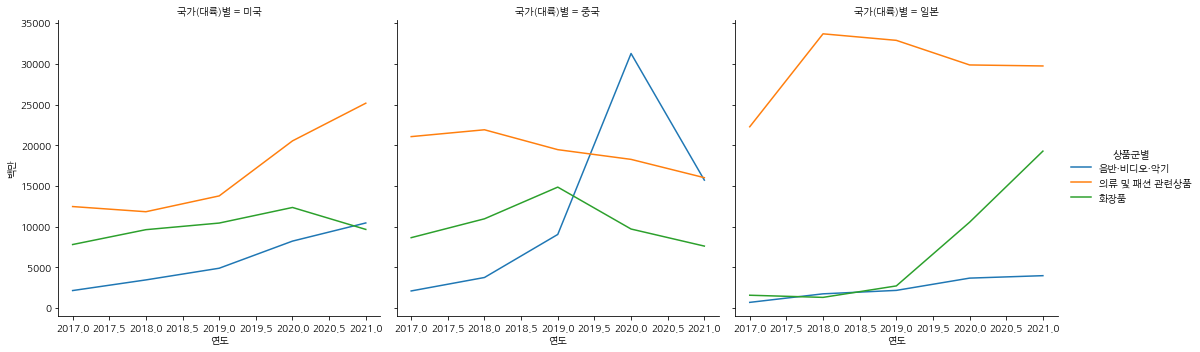

In [72]:
df_2021 = df_copy[df_copy['연도'] != 2022]
df_country = df_2021[(df_2021['국가(대륙)별'] == '미국') | (df_2021['국가(대륙)별'] == '중국') | (df_2021['국가(대륙)별'] == '일본')]
df_final = df_country[(df_country['상품군별'] == '음반·비디오·악기') | (df_country['상품군별'] == '의류 및 패션 관련상품') | (df_country['상품군별'] == '화장품')]
sns.relplot(data = df_final, x = '연도', y = '백만', hue = '상품군별', kind = 'line', col = '국가(대륙)별', ci = None)